# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':[9,9]},font_scale=1.3)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Raed The file using pandas 

In [2]:
df=pd.read_csv('netflix_titles.csv' )
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Analyze the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 395.5+ KB


In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df.drop('description',axis=1,inplace=True)

## Data Visualization

Most of the things on Netflix are movies (5377) and tv_shows(2410)

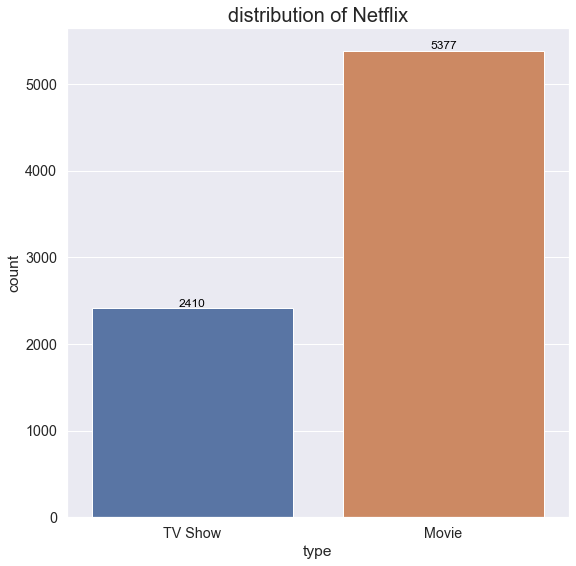

In [8]:
sns.countplot(data=df,x='type')
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2. , p.get_height() , '%d' % int(p.get_height())
            ,fontsize=12,color='black',ha='center',va='bottom')
    plt.title('distribution of Netflix',size=20)

seprate between movies and tv_shows

In [9]:
movies = df[df.type == 'Movie']
shows = df[df.type == 'TV Show']

## Movies Analysis¶


the releasing movies increase from 2011 till 2017 then its decrease gradually.

Text(0.5, 1.0, 'Total Releases of Movies for Last 10 Years ')

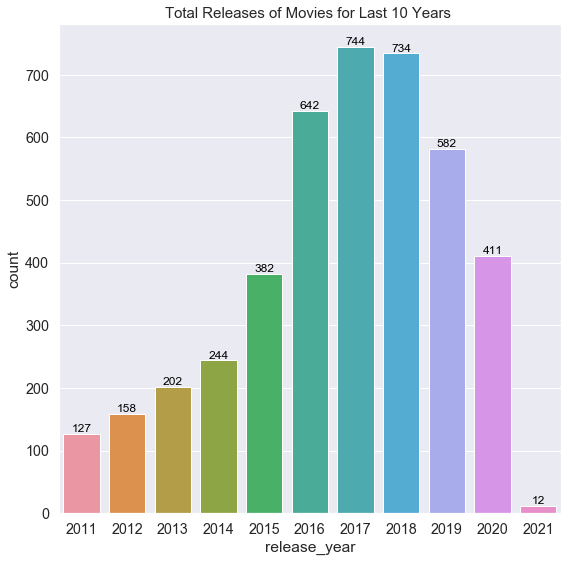

In [10]:
recent_5_years=movies[movies.release_year >= 2011]
sns.countplot(x='release_year',data=recent_5_years)
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Total Releases of Movies for Last 10 Years ',size='15')  

The Most director of movies Raul Campos. 

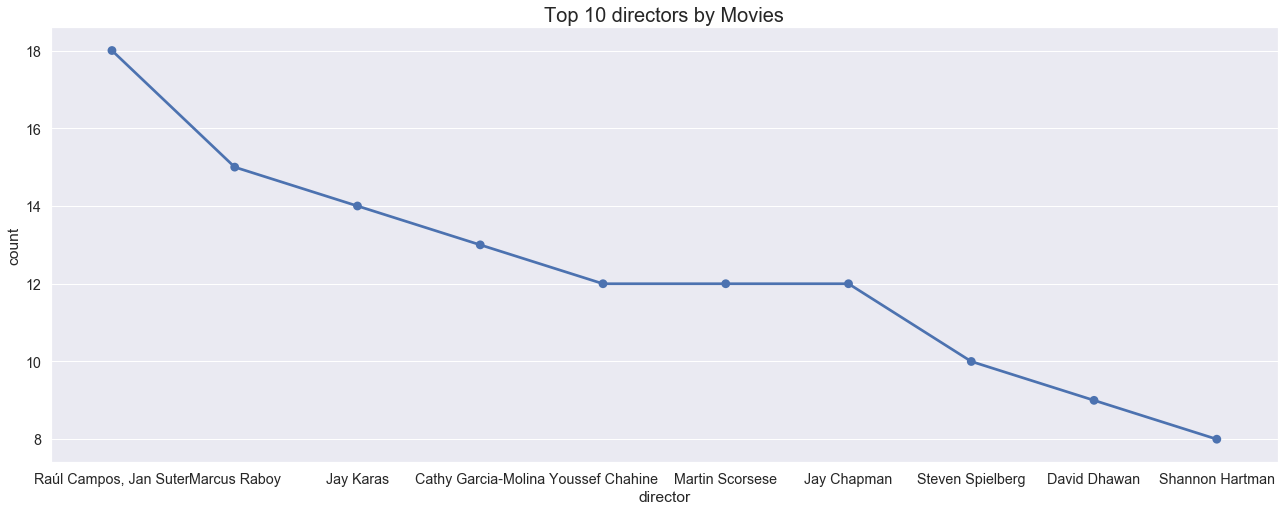

In [11]:
top_director = movies.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig, ax = plt.subplots(figsize=(22,8))

sns.pointplot(x='director',y='count',data=top_director.head(10))
plt.title('Top 10 directors by Movies',size='20')
plt.show()

# Different category ratings denotes the following:
Kids TV-Y Designed to be appropriate for all children

TV-Y7 Suitable for ages 7 and up

G Suitable for General Audiences

TV-G Suitable for General Audiences

PG Parental Guidance suggested

TV-PG Parental Guidance suggested

Teens PG-13 Parents strongly cautioned. May be Inappropriate for ages 12 and under.

TV-14 Parents strongly cautioned. May not be suitable for ages 14 and under.

Adults R Restricted. May be inappropriate for ages 17 and under.

TV-MA For Mature Audiences. May not be suitable for ages 17 and under.

NC-17 Inappropriate for ages 17 and under

The most category ratings is  TV-MA .

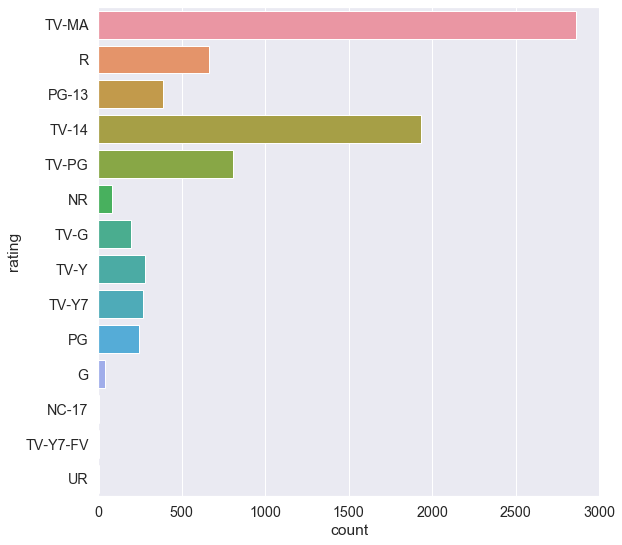

In [12]:
sns.countplot(y=df['rating'])

The most country releasing movies is United States .

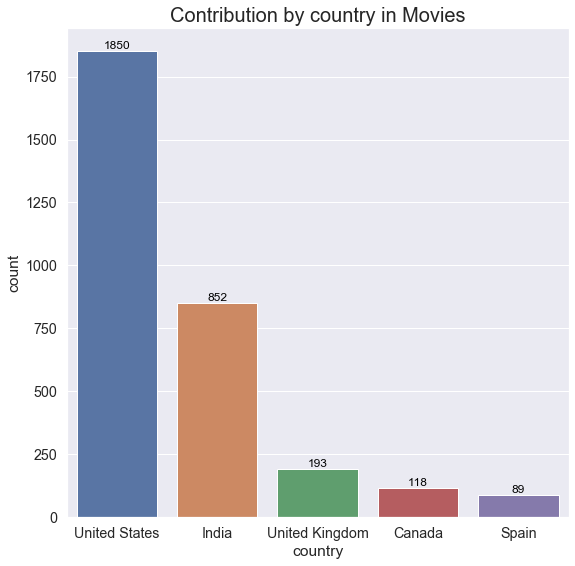

In [13]:
top5=movies.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
sns.barplot(data=top5.head(),y='count',x='country')
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2 , p.get_height() , '%d' % int(p.get_height()),fontsize=12
            ,color='black',ha='center',va='bottom')
    plt.title('Contribution by country in Movies',size=20)

# Analysing United States 

In [14]:
usa = df[df.country == 'United States']
usa.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers"
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers"


United States prduced 1850 movies and 750 TV-shows .

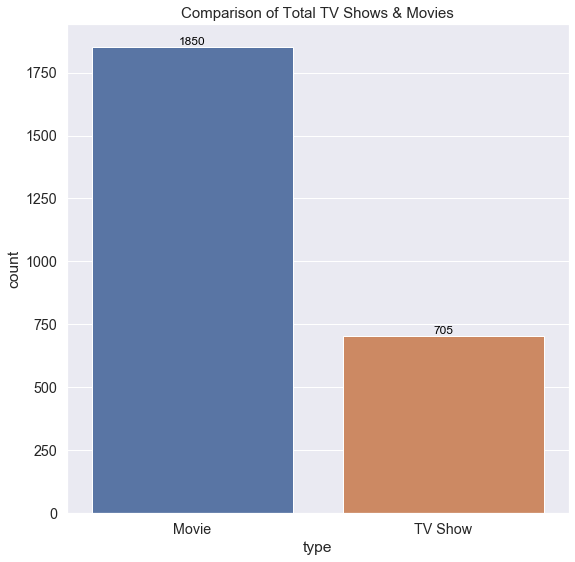

In [15]:
sns.countplot(x='type',data=usa)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Comparison of Total TV Shows & Movies',size='15')
plt.show()


The most categories in United States is are Documentaries .

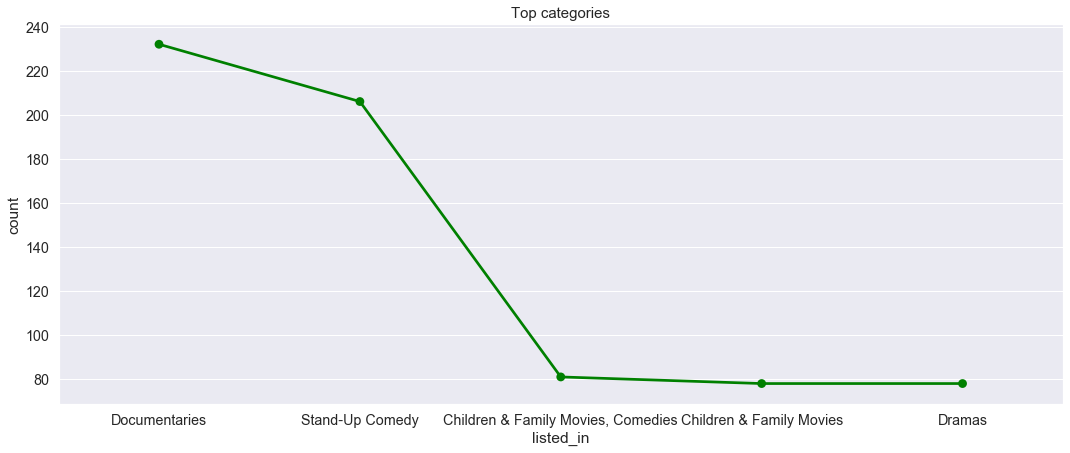

In [16]:
top_cat = usa.groupby(['listed_in'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig, ax = plt.subplots(figsize=(18,7))  
sns.pointplot(x='listed_in',y='count',data=top_cat.head(5),color='green')
plt.title('Top categories',size='15')
plt.show()

The Most director in United States is  Raul Marcus Raboy.

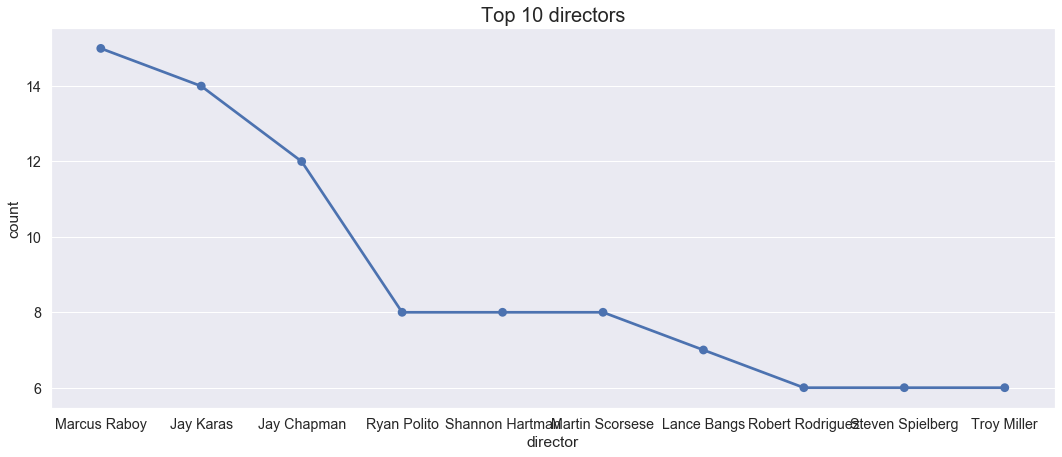

In [17]:
top_director = usa.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig, ax = plt.subplots(figsize=(18,7))
sns.pointplot(x='director',y='count',data=top_director.head(10))
plt.title('Top 10 directors',size='20')
plt.show()

In the last 5 years United States starts to reduce releasing movies 
and increase releasing of TV-shows gradually .

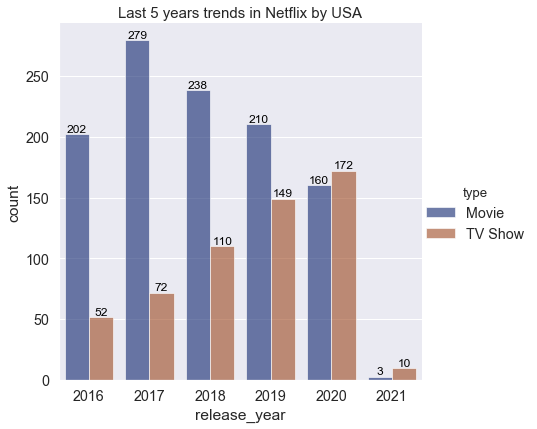

In [18]:
usa_recent5 =  usa[usa.release_year >= 2016]
g = sns.catplot(
    data=usa_recent5, kind="count",
    x="release_year", hue="type",
    ci="sd", palette="dark", alpha=.6, height=6)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Last 5 years trends in Netflix by USA',size='15')
plt.show()


## summry 

>+ Most of the things on Netflix are movies (5377) and tv_shows(2410),the releasing movies increase
from 2011 till 2017 then its decrease gradually.<br> 
>+ The Most director of movies Raul Campos.<br>
>+ The mostcategory ratings is  TV-MA .
>+ The most country releasing movies is United States.United States prduced 1850 movies and 750 TV-shows .<br>
>+ The most categories in United States is are Documentaries .The Most director in United States is Raul Marcus Raboy.<br>
>+ In the last 5 years United States starts to reduce releasing movies and increase releasing of TV-shows gradually .<br>